In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_json('./data/step_length_data.json')

In [21]:
df.iloc[0]

sourceName                  Dane phone 12
creationDate    2023-06-18 14:56:22 -0800
startDate       2023-06-18 14:50:25 -0800
endDate         2023-06-18 14:50:41 -0800
stepLength                         26.378
HKDevice                      0x280a57250
name                               iPhone
manufacturer                   Apple Inc.
model                              iPhone
hardware                         iPhone14
software                             16.5
Name: 0, dtype: object

In [22]:
# convert date strings to dates
df['startDate'] = pd.to_datetime(df.startDate)
df['endDate']   = pd.to_datetime(df.endDate)
df['creationDate'] = pd.to_datetime(df.creationDate)

In [23]:
# what data sources contributed data?
df.sourceName.value_counts()

sourceName
Cindy's iPhone SE    70969
Dane phone 12        46060
iPhone               19085
Dane phone 14        12181
Name: count, dtype: int64

An interesting to note here is that the step length data only comes from phone devices (as opposed to watches).

In [25]:
df.hardware.value_counts()

hardware
iPhone12    72032
iPhone14    46060
iPhone13    18022
iPhone15    12181
Name: count, dtype: int64

This is interesting as it does not align with completely with the data above.  Also we see that apple uses a different hardware value than the marketing name for the phone. "Dane phone 12" (an iPhone 12) matches "iPhone14" while "Dane phone 14" (an iPhone 14) matches "iPhone15". Then we have the other 2 entries where the data does not match between the two identifiers.

In [24]:
for n in df.sourceName.unique():
    min = df[df.sourceName == n].startDate.min()
    max = df[df.sourceName == n].startDate.max()
    print(f'{n:20s} has data from {min:%Y/%m/%d} to {max:%Y/%m/%d}')

Dane phone 12        has data from 2021/10/01 to 2023/06/26
Cindy's iPhone SE    has data from 2020/10/17 to 2023/11/09
iPhone               has data from 2020/09/27 to 2023/06/26
Dane phone 14        has data from 2023/06/26 to 2023/11/24


The data overlap here is a little confusing. The device iPhone seems to cover a broader date range than 12 and 14.  Possibly there is some form of device sync that causes this data to appear.

In [12]:
for n in df.sourceName.unique():
    min = df[df.sourceName == n].stepLength.min()
    max = df[df.sourceName == n].stepLength.max()
    print(f'{n:20s} has data from {min} to {max}')

Dane phone 12        has data from 5.11811 to 49.6063
Cindy's iPhone SE    has data from 11.0236 to 61.4173
iPhone               has data from 10.2362 to 43.3071
Dane phone 14        has data from 6.69291 to 48.0315


Even more interesting is that the data from iPhone has a smaller range than any of the other devices!

<Axes: >

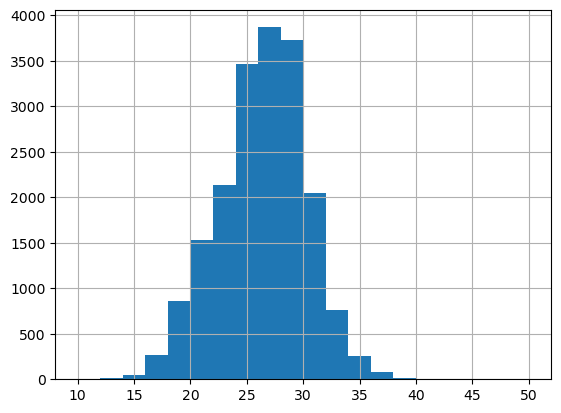

In [14]:
df[df.sourceName == 'iPhone'].stepLength.hist(bins=20, range=[10,50])

This data seems perfectly reasonable.

<Axes: >

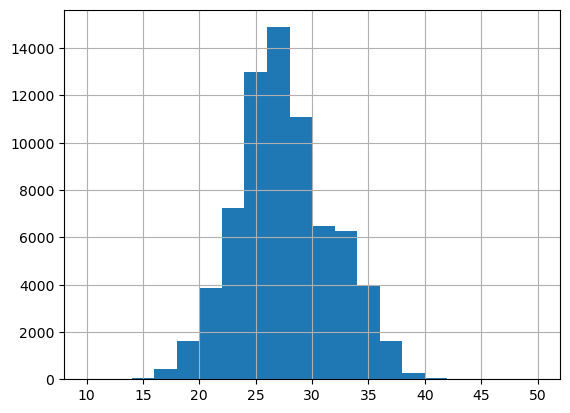

In [15]:
df[df.sourceName == "Cindy's iPhone SE"].stepLength.hist(bins=20, range=[10,50])

<Axes: >

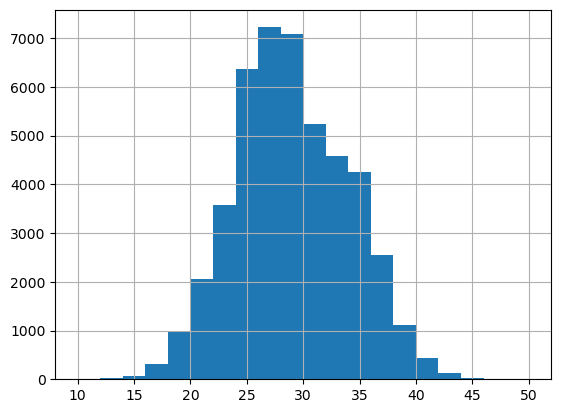

In [16]:
df[df.sourceName == "Dane phone 12"].stepLength.hist(bins=20, range=[10,50])

In [18]:
df.iloc[100]

sourceName              Cindy's iPhone SE
creationDate    2023-06-19 07:49:53-08:00
startDate       2023-06-19 07:47:53-08:00
endDate         2023-06-19 07:47:55-08:00
stepLength                        28.3465
Name: 100, dtype: object